# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [34]:
##Load the NLSY dataset
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')

#  Summary statistics

Inspect the data.

In [8]:
# Visualize the dataset
data.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012


In [9]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [11]:
data.columns

Index(['idcode', 'year', 'birth_yr', 'age', 'race', 'msp', 'nev_mar', 'grade',
       'collgrad', 'not_smsa', 'c_city', 'south', 'ind_code', 'occ_code',
       'union', 'wks_ue', 'ttl_exp', 'tenure', 'hours', 'wks_work', 'ln_wage'],
      dtype='object')

In [12]:
data['grade'].value_counts()

12.0    14252
16.0     2681
11.0     1781
14.0     1751
13.0     1734
10.0     1518
15.0      950
18.0      921
9.0       889
17.0      851
8.0       671
7.0       262
6.0       161
5.0        41
4.0        36
0.0        21
1.0         6
2.0         4
3.0         2
Name: grade, dtype: int64

In [24]:
# Tabulate college and union status
college_union = data[['collgrad', 'union']].dropna()
college_union.value_counts()

collgrad  union
0         0.0      12067
          1.0       3413
1         0.0       2661
          1.0       1097
dtype: int64

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage,log_hours
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214,2.995732
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620,3.784190
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977,3.688879
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273,3.688879
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012,2.302585


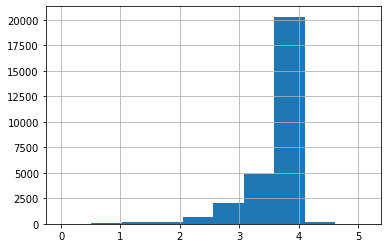

In [96]:
# Generate a variable for log hours worked
log_hours_worked = np.log(data['hours'])
log_hours_worked.hist()

# Add to dataframe (?)
data['log_hours'] = log_hours_worked

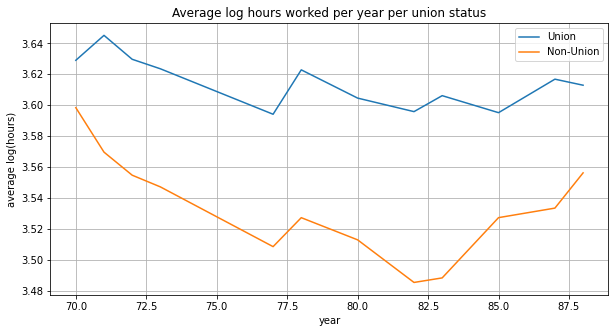

In [116]:
# Plot log hours against year separately for union and non-union

# Get a sorted list of unique years worked
# Need to exclude NaN union values as dimensions won't match otherwise
# We could alternatively treat union == NaN as union == 0 and include them (?)
distinct_years = np.sort(data[data['union'].notna()]['year'].unique())


# This auxiliary function is to get log hours by union status
# We first group by the year and then take the mean
def get_hours_worked(query):
    global data
    return data.query(query).groupby('year')['log_hours'].mean()


# Average log hours worked per year by union status
log_hours_per_year_union = get_hours_worked('union == 1')
log_hours_per_year_nonunion = get_hours_worked('union == 0')

# Show some pretty graphs
fig = plt.figure(figsize=(10, 5))
plt.title('Average log hours worked per year per union status')
plt.xlabel('year')
plt.ylabel('average log(hours)')
plt.plot(distinct_years, log_hours_per_year_union, label='Union')
plt.plot(distinct_years, log_hours_per_year_nonunion, label='Non-Union')
plt.legend()
plt.grid()
plt.show()

# Regression: Effect of union status on hours worked

In [129]:
# Regress hours worked against union status and display the results
res = smf.ols('hours ~ union', data=data).fit()

In [130]:
# Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     136.6
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           1.85e-31
Time:                        12:38:34   Log-Likelihood:                -70568.
No. Observations:               19202   AIC:                         1.411e+05
Df Residuals:                   19200   BIC:                         1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3112      0.079    461.166      0.000      36.157      36.466
union          1.9006      0.163     11.689      0.000       1.582       2.219
==============================================================================
Omnibus:                     4058.592   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22932.168
Skew:                          -0.900   Prob(JB):                         0.00
Kurtosis:                       8.042   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What is the identification assumption for the coefficient on union to be causal?

We are assuming that the error term is uncorrelated with the treatment variable, that is $\text{Cov}(\texttt{union}_i, \epsilon_i) = 0$

This is equivalent to stating that there are no confounders. This assumption might be wrong, as possible confounders could be the industry the person works in or the person's education status.

In [131]:
# Add education (collgrad) to the regression and compare the coefficient on union with the previous result
res2 = smf.ols('hours ~ union + collgrad', data=data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     145.2
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           2.69e-63
Time:                        12:38:36   Log-Likelihood:                -70492.
No. Observations:               19202   AIC:                         1.410e+05
Df Residuals:                   19199   BIC:                         1.410e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9239      0.084    425.314      0.000      35.758      36.089
union          1.7661      0.162     10.880      0.000       1.448       2.084
collgrad       2.1420      0.173     12.353      0.000       1.802       2.482
==============================================================================
Omnibus:                     4212.730   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22770.233
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                       7.984   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient on union is lower when considering college status. This could be explained by college graduates receiving more job offers or having more stable jobs, leading to them working more hours total (or spending less time being unemployed).

In [139]:
# Add occupation codes to the regression and compare the results with the previous one
res3 = smf.ols('hours ~ union + C(occ_code)', data=data).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     124.5
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:43:52   Log-Likelihood:                -69582.
No. Observations:               19129   AIC:                         1.392e+05
Df Residuals:                   19115   BIC:                         1.393e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              36.5500      0.193    189.716      0.000      36.172      36.928
C(occ_code)[T.2.0]      4.5761      0.321     14.262      0.000       3.947       5.205
C(occ_code)[T.3.0]     -0.2517      0.218     -1.155      0.248      -0.679       0.176
C(occ_code)[T.4.0]     -4.6075      0.384    -12.008      0.000      -5.360      -3.855
C(occ_code)[T.5.0]      2.9850      0.540      5.524      0.000       1.926       4.044
C(occ_code)[T.6.0]      1.9416      0.263      7.395      0.000       1.427       2.456
C(occ_code)[T.7.0]    -11.0981      0.582    -19.058      0.000     -12.240      -9.957
C(occ_code)[T.8.0]     -3.1660      0.263    -12.040      0.000      -3.681      -2.651
C(occ_code)[T.9.0]     -6.2167      5.314     -1.170      0.242     -16.632       4.199
C(occ_code)[T.10.0]    -0.0656      1.255     -0.052      0.958      -2.525       2.394
C(occ_code)[T.11.0]     0.2354      0.898      0.262      0.793      -1.525       1.996
C(occ_code)[T.12.0]     3.2262      4.118      0.783      0.433      -4.845      11.297
C(occ_code)[T.13.0]     2.7717      0.322      8.616      0.000       2.141       3.402
union                   1.1192      0.163      6.849      0.000       0.799       1.440
==============================================================================
Omnibus:                     3715.173   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26823.971
Skew:                          -0.745   Prob(JB):                         0.00
Kurtosis:                       8.606   Cond. No.                         90.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I assume `occ_code` should be treated as a categorical value.

In this case, the coefficient on union is drastically lower than in the first case. This implies that the occupation has a significant contribution to the working hours.

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?

Working hours might differ a lot between occupations. For example, a container ship captain would work almost 24/7 during a trip while a receptionist works only during peak check-in and check-out hours. Additionally, some occupations might not even have worker unions, thus making `union` be correlated to `occ_code`.

In [141]:
cols = data.columns
for col in cols:
    print(col)

idcode
year
birth_yr
age
race
msp
nev_mar
grade
collgrad
not_smsa
c_city
south
ind_code
occ_code
union
wks_ue
ttl_exp
tenure
hours
wks_work
ln_wage
log_hours


#### What are "good controls" in the dataset in terms of being exogenous to union status?

Note to self: "X is exogenous to union status" <=> "union status depends on X but X does not depend on union status"
                                               <=> "Relation between X and union status is strictly one-way"

Some possible controls could be:

- `race`: People of color might be more inclined to join a worker union due to unfair treatment. Being in a union does not determine race, however.
- `msp`: Married women (at least in those times) generally worked reduced hours or stopped working altogether. Being a union member has no influence on marriage status, though.

In [166]:
# Add these controls to the regression
res4 = smf.ols('hours ~ union + C(race) + msp', data=data).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     175.8
Date:                Fri, 08 Oct 2021   Prob (F-statistic):          3.84e-148
Time:                        15:52:01   Log-Likelihood:                -70251.
No. Observations:               19191   AIC:                         1.405e+05
Df Residuals:                   19186   BIC:                         1.406e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           38.0224      0.130    291.493      0.000      37.767      38.278
C(race)[T.black]     0.8497      0.155      5.498      0.000       0.547       1.153
C(race)[T.other]     1.1011      0.654      1.683      0.092      -0.182       2.384
union                1.6718      0.161     10.371      0.000       1.356       1.988
msp                 -3.0865      0.142    -21.687      0.000      -3.365      -2.808
==============================================================================
Omnibus:                     3738.017   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23163.391
Skew:                          -0.794   Prob(JB):                         0.00
Kurtosis:                       8.143   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How do these change your estimates?

The coefficient for union is lower than in the previous estimates. This indicates that hours are less strongly correlated to union status than previously assumed. Other factors such as marriage status also have a rather strong impact on hours worked.

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

Article: **How sleeping less than 7 hours a night can lead to weight gain**

https://www.foxnews.com/health/sleeping-less-than-7-hours-night-weight-gain

The article claims that having a bad sleep schedule (i.e. sleeping less than 7 hours a day) will lead to a more unhealthy lifestyle, including more unhealthy choices with regard to meals. The article explains the causation in that people who stay up longer tend to eat more snacks and prepared food than people who go to bed early, simply because they have more time to consume unhealthy products:

> "Not only are we not sleeping when we stay up late, but we’re doing all these obesity-related behaviors: lack of physical activity, increased screen time, food choices that we’re consuming as snacks and not as meals, [...]. The longer we’re awake, the more opportunities we have to eat. And at night, those calories are coming from snacks and sweets."
>
> Christopher Taylor, Ohio State University (OSU) professor of medical dietetics at the School of Health and Rehabilitation Sciences

So, in the author's mind, sleeping less than 7 hours a day was the treatment, and gaining weight was the outcome. The article however not only mentions eating habits, but also habits related to screen time or physical activity, so what it is really talking about is a generally unhealthy lifestyle. This is equivalent to stating that sleeping less than 7 hours a day causes an unhealthy lifestyle, which in turn can cause weight gain.

In my opinion, sleep habits is way less a choice than the article makes it out to be. Generally, I consider sleep habits rather a result of many other factors external factors such as job, housing, hobbies, social environment or status; That is, sleep is an effect of an unhealthy lifestyle (whether it is voluntary or not). For example, if a person lives far from their job where they are working long hours, they won't have a lot of time to prepare meals when at home, resorting to prepared foods (which in turn cause obesity, and little sleep is just another effect of their job conditions).

Of course little sleep and weight gain are correlated, as an unhealthy lifestyle includes both unhealthy sleep habits and an unhealthy diet. So we can conclude that little sleep and weight gain are definitely correlated, but the causation might not be as strong as the article makes it out to be.